In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, classification_report , confusion_matrix, accuracy_score

In [2]:
df = pd.read_csv('Customer-Churn-Records.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [4]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


In [5]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain',
       'Satisfaction Score', 'Card Type', 'Point Earned'],
      dtype='object')

In [6]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname', 'Card Type'], axis=1)

In [7]:
label = LabelEncoder()

In [8]:
df['Gender'] = label.fit_transform(df['Gender'])

In [9]:
counts = {}
for value in df['Gender']:
    if value in counts:
        counts[value]+=1
    else:
        counts[value] = 1

print(counts)


{0: 4543, 1: 5457}


In [10]:
ohe = OneHotEncoder()

In [11]:
encoded = ohe.fit_transform(df[['Geography']])

In [12]:
encoded

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 10000 stored elements and shape (10000, 3)>

In [13]:
ohe.get_feature_names_out()

array(['Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype=object)

In [14]:
df_geo = pd.DataFrame(encoded.toarray(), columns=ohe.get_feature_names_out())

In [15]:
df = pd.concat([df, df_geo], axis=1)

In [16]:
df = df.drop(['Geography'], axis=1)

In [17]:
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1,2,464,1.0,0.0,0.0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,1,3,456,0.0,0.0,1.0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1,3,377,1.0,0.0,0.0
3,699,0,39,1,0.00,2,0,0,93826.63,0,0,5,350,1.0,0.0,0.0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,5,425,0.0,0.0,1.0


In [18]:
X = df.drop(['Exited'],axis=1)
y = df['Exited']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [20]:
random_forest = RandomForestClassifier(n_estimators=10, random_state=3, max_depth=6)

In [21]:
random_forest.fit(X_train, y_train)

,n_estimators,10
,criterion,'gini'
,max_depth,6
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [22]:
y_pred = random_forest.predict(X_test)
y_train_pred = random_forest.predict(X_train)

In [23]:
print('Trainig report\n:', classification_report(y_train, y_train_pred))

print('testing report\n:', classification_report(y_test, y_pred))


Trainig report
:               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5568
           1       0.99      1.00      1.00      1432

    accuracy                           1.00      7000
   macro avg       1.00      1.00      1.00      7000
weighted avg       1.00      1.00      1.00      7000

testing report
:               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2394
           1       1.00      1.00      1.00       606

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000



In [24]:
print(f"Accuracy on train data {random_forest.score(X_train, y_train)}")
print(f"Accuracy on test data {random_forest.score(X_test, y_test)}")

Accuracy on train data 0.9985714285714286
Accuracy on test data 0.999


In [25]:
con_mat = confusion_matrix(y_test, y_pred)

<Axes: >

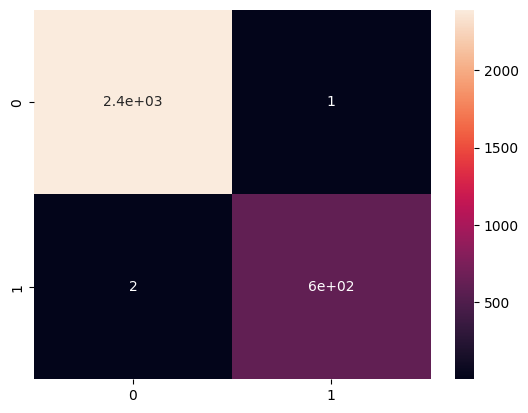

In [26]:
sns.heatmap(con_mat, annot=True)


In [40]:
X.columns.tolist()

['CreditScore',
 'Gender',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Complain',
 'Satisfaction Score',
 'Point Earned',
 'Geography_France',
 'Geography_Germany',
 'Geography_Spain']

In [27]:
columns = X.columns

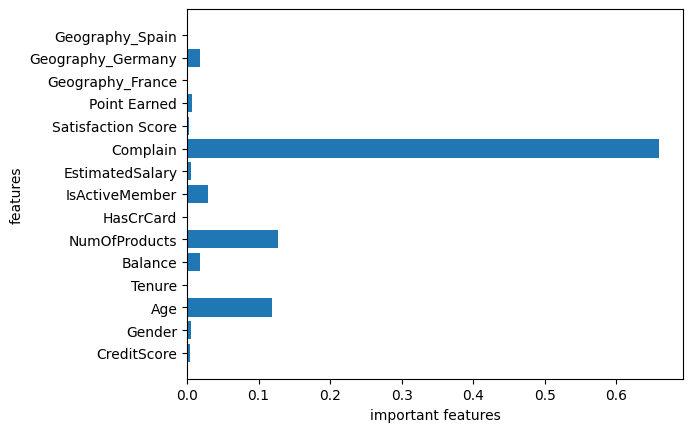

In [28]:
plt.barh(columns, random_forest.feature_importances_, align='center')
plt.xlabel('important features')
plt.ylabel('features')
plt.show()

In [29]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2'],
    'class_weight': [None, 'balanced']
}

In [30]:
rf_classifier = RandomForestClassifier(random_state=123)

grid = GridSearchCV(
    estimator= rf_classifier,
    param_grid= param_grid,
    cv=5,
    n_jobs= -1,
    scoring='recall'
)

In [31]:
grid.fit(X_train , y_train)

,estimator,RandomForestC...dom_state=123)
,param_grid,"{'class_weight': [None, 'balanced'], 'max_depth': [None, 5, ...], 'max_features': ['sqrt', 'log2'], 'min_samples_leaf': [1, 2], ...}"
,scoring,'recall'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,100


In [32]:
grid.best_params_

{'class_weight': None,
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [33]:
best_model = grid.best_estimator_

In [34]:
y_pred = best_model.predict(X_test)

print('accuracy\n', accuracy_score(y_test, y_pred) )

accuracy
 0.9993333333333333


In [35]:
print(confusion_matrix(y_test, y_pred))

[[2393    1]
 [   1  605]]


In [36]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2394
           1       1.00      1.00      1.00       606

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000



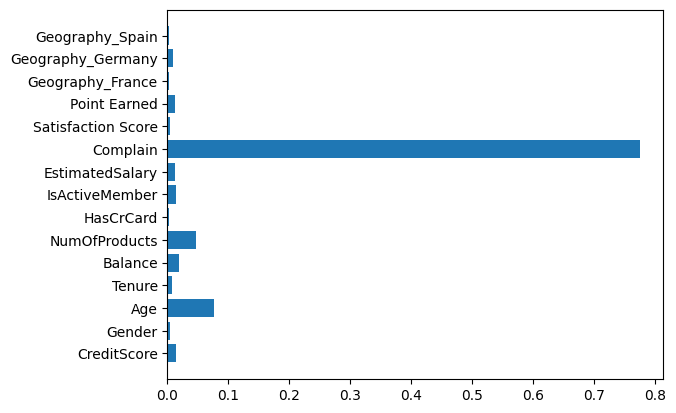

In [37]:
plt.barh(columns, best_model.feature_importances_, align='center')
plt.show()

In [38]:
import joblib

In [39]:
joblib.dump(best_model, 'churn_pred_rf_model.pkl')
joblib.dump(label, 'random_label.pkl')
joblib.dump(ohe, 'random_ohe.pkl')

['random_ohe.pkl']